# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

#### Import Required

In [1]:
# Load pickled data
import pickle

import random
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import os
import pickle
from urllib.request import urlretrieve
import matplotlib.image as mpimg
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
import tensorflow as tf
from sklearn.utils import shuffle
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline
tf.reset_default_graph()



C:\Program Files\Anaconda3\envs\CarND-Traffic-Sign-Classifier-Project\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Import Data

In [2]:
training_file = 'C:\\Users\\aanay\\Udacity Hw2\\CarND-Traffic-Sign-Classifier-Project-master\\train.p'
testing_file = 'C:\\Users\\aanay\\Udacity Hw2\\CarND-Traffic-Sign-Classifier-Project-master\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

### Get data Summary

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Visualization

label-  2
label-  25
label-  20
label-  34
label-  8


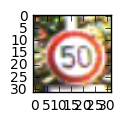

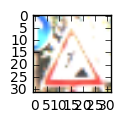

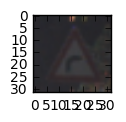

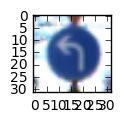

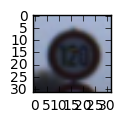

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
for i in range(5):
    plt.figure()
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print("label- ",y_train[index])

    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Data Preprocessing (Convert to grayscale + Normalize)

In [5]:

X_train, y_train = shuffle(X_train, y_train)
train_features=[]
test_features=[]
gray_images_disp=[]

for i in range(0,len(X_train)):
    image=X_train[i]
    gray_image= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_gray=np.copy(gray_image)
    cv2.normalize(gray_image,norm_gray, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_gray_expand = norm_gray[:, :, np.newaxis]
    train_features.append(norm_gray_expand)
    
    
for i in range(0,len(X_test)):
    image=X_test[i]
    gray_image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_gray=np.copy(gray_image)
    cv2.normalize(gray_image,norm_gray, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_gray_expand = norm_gray[:, :, np.newaxis]
    test_features.append(norm_gray_expand)

print('Normalized Gray sclae images')

train_features=np.asarray(train_features)
test_features=np.asarray(test_features)


Normalized Gray sclae images


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

To preprocess the data, the images were converted to grayscale images and normalized. Grayscale was used in order to use Alexnet. The images were normaized to a range of 0.1 to 0.9 to improve the results and make it easier for the optimization to proceed numerically

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

The dataset was divided into training set and validation set, with the later being 5% of the total dataset. No additional data was generated.

The testing data was taken from the testing dataset

### Split dataset into training and validation set

In [7]:
train_features, valid_features, train_labels, valid_labels = train_test_split(train_features,y_train,test_size=0.05,random_state=832289)

print('Training feature and labels randomized and split')

Training feature and labels randomized and split


**Answer:** Lenet architecture was used because of its simple model and reference was taken from the LeNet Lab.

### Lenet Architecture

In [8]:
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Logits + Cross Entropy + Loss operation

In [10]:
rate = 0.001

logits = LeNet(x)
softmax_calculation=tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [11]:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The Lenet model was used to train on the traffic sign dataset. It has two convolutional and three fully connected layers.

(Source-review feedback)The structure is:
1) Input size (32x32x1) as image used is grayscale.
2) Convolution Layer (5x5x1), Output-28x28x6
3) Relu
4) Maxpool(2x2): output-14x14x6
5) Convolution Layer (5x5x1), Output-28x28x6
6) Relu
7) Maxpool(2x2)
8) Flatten(400 nodes)
9) Fully Connected Layer - 120 outputs
10) Fully Connected Layer - 84 outputs
11) Fully connected Layer(Logits) - 43 outputs
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Train model and save file

In [12]:
save_file = './modelproject.ckpt'
train_features=np.asarray(train_features)
train_labels=np.asarray(train_labels)
valid_features=np.asarray(valid_features) 
valid_labels=np.asarray(valid_labels)
print("Training before")
print(train_features[0].shape)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training before
(32, 32, 1)
Training...

EPOCH 1 ...
Validation Accuracy = 0.845

EPOCH 2 ...
Validation Accuracy = 0.898

EPOCH 3 ...
Validation Accuracy = 0.935

EPOCH 4 ...
Validation Accuracy = 0.938

EPOCH 5 ...
Validation Accuracy = 0.945

EPOCH 6 ...
Validation Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.960

EPOCH 9 ...
Validation Accuracy = 0.959

EPOCH 10 ...
Validation Accuracy = 0.953

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.969

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.964

EPOCH 15 ...
Validation Accuracy = 0.971

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.975

EPOCH 18 ...
Validation Accuracy = 0.974

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.958

Model saved


## Test accuracy on test set

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_features, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.891


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**The model was trained for 20 epochs with a batch size of 128. Adam optimizer was used with a learning rate of 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The Lenet model was used as it a very simple model yet effective model that works well for image classification. An initial model of one convolution and one fully connected layer was tested out, but it did not have the required accuracy.
The model when trained gave good results with the validation accuracy being 95.7%. Hence it was used

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

## Load New Images to test the model

[13 17  1 12 11]


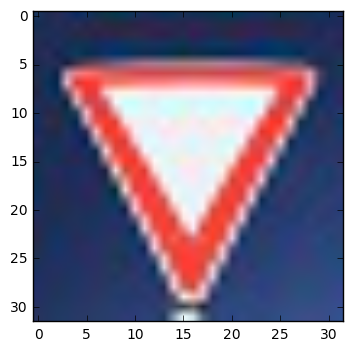

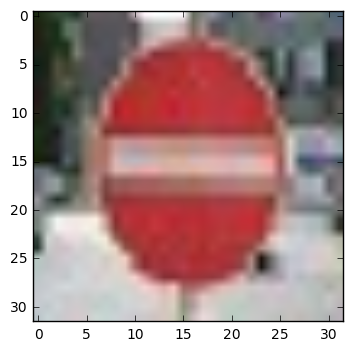

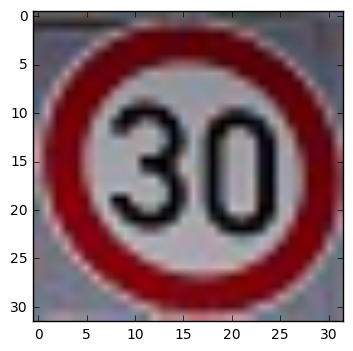

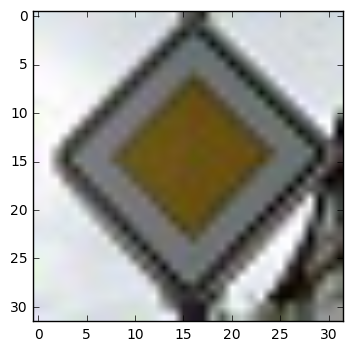

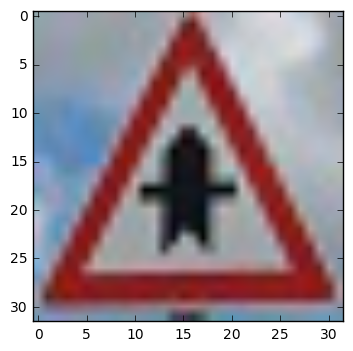

In [17]:
test_new_images=[]
label_new_images=[]

image1 = cv2.imread('test_images/yield.jpg')
image1=cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
gray_image= cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
norm_gray1=np.copy(gray_image)
cv2.normalize(gray_image,norm_gray1, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_gray1 = norm_gray1[:, :, np.newaxis]
label_expected1=13
plt.figure(0)
plt.imshow(image1)

image2= cv2.imread('test_images/NoEntry.jpg')
image2=cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
label_expected2=17
gray_image= cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
norm_gray2=np.copy(gray_image)
cv2.normalize(gray_image,norm_gray2, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_gray2 = norm_gray2[:, :, np.newaxis]
plt.figure(1)
plt.imshow(image2)

image3 = cv2.imread('test_images/30.jpg')
image3=cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
label_expected3=1
gray_image= cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
norm_gray3=np.copy(gray_image)
cv2.normalize(gray_image,norm_gray3, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_gray3 = norm_gray3[:, :, np.newaxis]
plt.figure(2)
plt.imshow(image3)

image4 = cv2.imread('test_images/priority12.jpg')
image4=cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
label_expected4=12
gray_image= cv2.cvtColor(image4, cv2.COLOR_RGB2GRAY)
norm_gray4=np.copy(gray_image)
cv2.normalize(gray_image,norm_gray4, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_gray4 = norm_gray4[:, :, np.newaxis]
plt.figure(3)
plt.imshow(image4)

image5 = cv2.imread('test_images/rw.jpg')
image5=cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)
label_expected5=11
gray_image= cv2.cvtColor(image5, cv2.COLOR_RGB2GRAY)
norm_gray5=np.copy(gray_image)
cv2.normalize(gray_image,norm_gray5, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_gray5 = norm_gray5[:, :, np.newaxis]
plt.figure(4)
plt.imshow(image5)


test_new_images.append(norm_gray1)
test_new_images.append(norm_gray2)
test_new_images.append(norm_gray3)
test_new_images.append(norm_gray4)
test_new_images.append(norm_gray5)
test_new_images=np.asarray(test_new_images)
test_new_images = test_new_images.astype(np.float32)

label_new=np.asarray([label_expected1,label_expected2,label_expected3,label_expected4,label_expected5])
print(label_new)
label_new_images = label_new.astype(np.int32)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**The five images were used. They were properly identified by the model. SOme other images were also tried out that were not classified. The orientation made it difficult to be identified in some images.

## Predict label on new Images

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
test_new_images=np.asarray(test_new_images)

prediction = tf.nn.softmax(logits)
predicted_label = tf.argmax(prediction, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #temp_store=[]
    #temp_store.append(image1)
    p=sess.run(predicted_label, feed_dict={x: test_new_images})
    print("Label = {:}".format(predicted_label))
    test_accuracy = evaluate(test_new_images, label_new_images)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    saver.save(sess, save_file)
    print("Predicted labels",p)
    print("Actual Labels", label_new)

Label = Tensor("ArgMax_3:0", shape=(?,), dtype=int64)
Test Accuracy = 1.000
Predicted labels [13 17  1 12 11]
Actual Labels [13 17  1 12 11]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**The model was able to properly identify the labels for the images. The reults were manually verified to be correct.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

## Visualize softmax probabilities

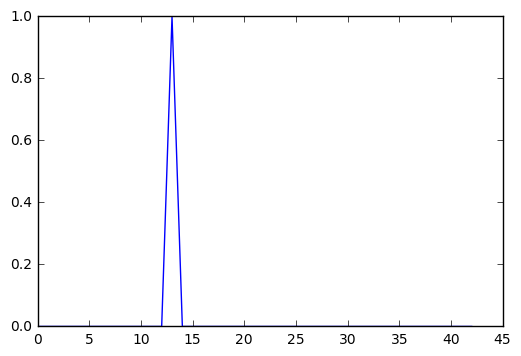

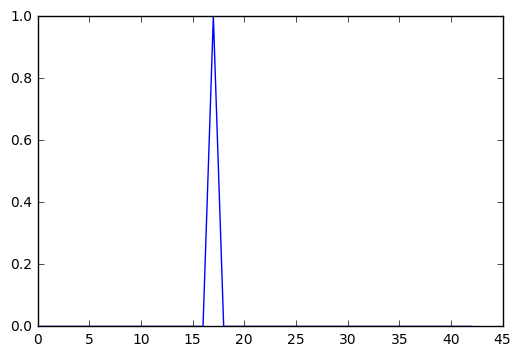

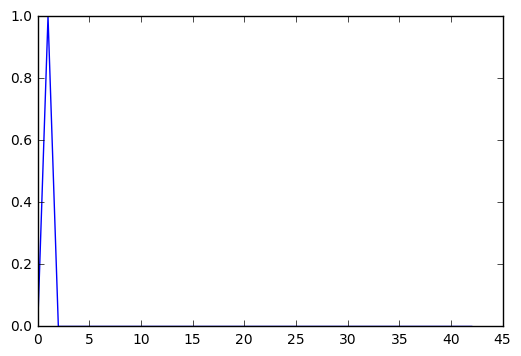

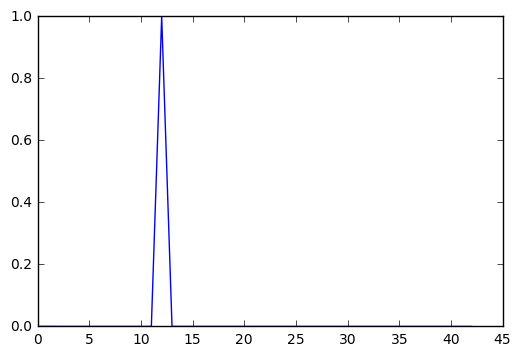

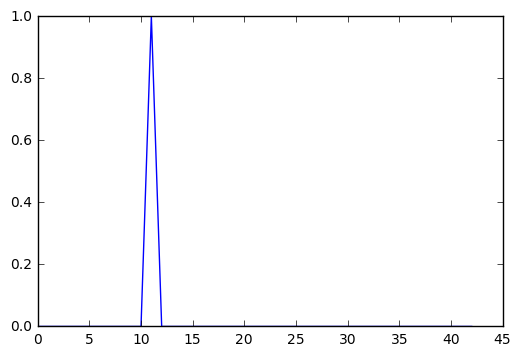

In [19]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ls=sess.run(logits,feed_dict={x: test_new_images})
    
    for s in ls:
        plt.figure()
        to_plot=tf.nn.softmax(s)
        plt.plot(to_plot.eval())

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.